##  Clustering

O K-Means é um algoritmo muito utilizado para agrupamento de dados. Além de ser bastante simples, funciona bem na prática
tendo aplicações para a clusterização de cestas de consumos, criação de personas e etc. O objetivo deste método é particionar os dados em uma quantidade K de agrupamentos, minimizando a distância intraclusters e maximizando a distância interclusters.

- Elaboração de personas: Persona é a representação fictícia do seu cliente ideal. Ela é baseada em dados reais sobre comportamento e características demográficas dos seus clientes. Apresenta, também, uma criação de suas histórias pessoais, motivações, objetivos, desafios e preocupações.

-  Identificar os hábitos de consumo dos consumidores é uma parte essencial para o negócio crescer. Para qualquer negócio prosperar, você precisa encontrar os principais hábitos de consumos para conseguir direcionar ações para esse público. 

Os exemplos apresentados são um exemplo de algoritmo não supervisionado:

A aprendizagem não supervisionada está relacionado com a inexatidão do que os resultados vão aparentar, a estrutura de dados não está relacionado com qualquer fator de previsão. 

## Passo a passo do K- Means

In [49]:
from IPython.display import Image, HTML
from matplotlib import animation
Image(url='https://i.imgur.com/wcpFFiu.gif') 

## Seu funcionamento é simples, seguindo a seguinte lógica. 

- Primeiramente, deve-se escolher K centroídes iniciais, que representam os centros dos K agrupamentos dados por C1, ..., CK, onde K ≥ 2. A escolha do número de centroídes deve ser feita pelo pesquisador;

- Em seguida os centroídos são atribuídos no espaço e se inicia um processo de interação com o objetivo de minimizar a distância entre as observações do mesmo cluster. O critério de distância é definido pelo pesquisador havendo uma gama de critérios de distâncias que podem ser escolhidos. A seguir serão explorados dois critérios de distâncias, sendo elas a distância euclidiana e a distância de manhattan;

- Em vista do uso do critério de distância é imprescindivel o ajuste de escala, dado a sensibilidade do algoritmo;

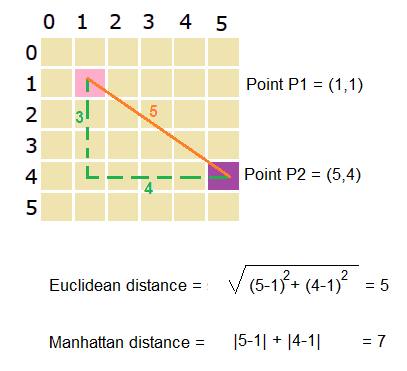

- Uma dúvida que surge é como definir o número ótimo de centroídes. Dessa maneira, existem técnicas para seleção do número ótimo de cluster sendo elas inércia e silhueta escore.

## Vantagens

- Busca maximizar a dispersão entre os centroídes (clusters bem separados).

- Simplicidade de cálculo, calcula somente as distâncias entre os objetos e os centroídes dos clusters.

## Desvantagens

-  A solução é dependente da inicialização (conjuntos de sementes iniciais), principalmente se a seleção das sementes é aleatória.

- Não há nenhuma garantia de um agrupamento ótimo dos objetos.


In [50]:
import janitor
from sklearn.cluster import KMeans 
from kmodes.kprototypes import KPrototypes 
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
from yellowbrick.cluster import InterclusterDistance
from matplotlib import cm
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

# Clusterização de clientes

## Descrição das variáveis

- Cliente 
- Gênero 
- Idade
- Renda Anual
- Escore para o gasto de cliente;







# Leitura do Dataset

In [51]:
dataset = pd.read_csv(r'C:\Users\Angelo\Desktop\mall_customers.csv',encoding='utf-8').clean_names()
dataset.head()

,customerid,genre,age,annual_income_k$_,spending_score_1_100_
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Transformando coluna em índice

In [52]:
dataset.set_index("customerid", inplace = True)

# Selecionando as variáveis e transformando em arrays

In [53]:
data_x = dataset.iloc[:, 1:4]
data_x.head()

x_array =  np.array(data_x)
print(x_array)

[[ 19  15  39]
 [ 21  15  81]
 [ 20  16   6]
 [ 23  16  77]
 [ 31  17  40]
 [ 22  17  76]
 [ 35  18   6]
 [ 23  18  94]
 [ 64  19   3]
 [ 30  19  72]
 [ 67  19  14]
 [ 35  19  99]
 [ 58  20  15]
 [ 24  20  77]
 [ 37  20  13]
 [ 22  20  79]
 [ 35  21  35]
 [ 20  21  66]
 [ 52  23  29]
 [ 35  23  98]
 [ 35  24  35]
 [ 25  24  73]
 [ 46  25   5]
 [ 31  25  73]
 [ 54  28  14]
 [ 29  28  82]
 [ 45  28  32]
 [ 35  28  61]
 [ 40  29  31]
 [ 23  29  87]
 [ 60  30   4]
 [ 21  30  73]
 [ 53  33   4]
 [ 18  33  92]
 [ 49  33  14]
 [ 21  33  81]
 [ 42  34  17]
 [ 30  34  73]
 [ 36  37  26]
 [ 20  37  75]
 [ 65  38  35]
 [ 24  38  92]
 [ 48  39  36]
 [ 31  39  61]
 [ 49  39  28]
 [ 24  39  65]
 [ 50  40  55]
 [ 27  40  47]
 [ 29  40  42]
 [ 31  40  42]
 [ 49  42  52]
 [ 33  42  60]
 [ 31  43  54]
 [ 59  43  60]
 [ 50  43  45]
 [ 47  43  41]
 [ 51  44  50]
 [ 69  44  46]
 [ 27  46  51]
 [ 53  46  46]
 [ 70  46  56]
 [ 19  46  55]
 [ 67  47  52]
 [ 54  47  59]
 [ 63  48  51]
 [ 18  48  59]
 [ 43  48 

# Métodos para ajuste de escala 

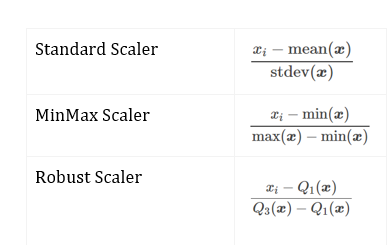

In [54]:
from sklearn.preprocessing import RobustScaler

scaler =  RobustScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled

array([[-0.83950617, -1.2739726 , -0.2875817 ],
       [-0.74074074, -1.2739726 ,  0.81045752],
       [-0.79012346, -1.24657534, -1.1503268 ],
       [-0.64197531, -1.24657534,  0.70588235],
       [-0.24691358, -1.21917808, -0.26143791],
       [-0.69135802, -1.21917808,  0.67973856],
       [-0.04938272, -1.19178082, -1.1503268 ],
       [-0.64197531, -1.19178082,  1.1503268 ],
       [ 1.38271605, -1.16438356, -1.22875817],
       [-0.2962963 , -1.16438356,  0.5751634 ],
       [ 1.5308642 , -1.16438356, -0.94117647],
       [-0.04938272, -1.16438356,  1.28104575],
       [ 1.08641975, -1.1369863 , -0.91503268],
       [-0.59259259, -1.1369863 ,  0.70588235],
       [ 0.04938272, -1.1369863 , -0.96732026],
       [-0.69135802, -1.1369863 ,  0.75816993],
       [-0.04938272, -1.10958904, -0.39215686],
       [-0.79012346, -1.10958904,  0.41830065],
       [ 0.79012346, -1.05479452, -0.54901961],
       [-0.04938272, -1.05479452,  1.25490196],
       [-0.04938272, -1.02739726, -0.392

In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

In [56]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
x_scaled = scaler.fit_transform(x_array)
x_scaled

array([[0.01923077, 0.        , 0.3877551 ],
       [0.05769231, 0.        , 0.81632653],
       [0.03846154, 0.00819672, 0.05102041],
       [0.09615385, 0.00819672, 0.7755102 ],
       [0.25      , 0.01639344, 0.39795918],
       [0.07692308, 0.01639344, 0.76530612],
       [0.32692308, 0.02459016, 0.05102041],
       [0.09615385, 0.02459016, 0.94897959],
       [0.88461538, 0.03278689, 0.02040816],
       [0.23076923, 0.03278689, 0.7244898 ],
       [0.94230769, 0.03278689, 0.13265306],
       [0.32692308, 0.03278689, 1.        ],
       [0.76923077, 0.04098361, 0.14285714],
       [0.11538462, 0.04098361, 0.7755102 ],
       [0.36538462, 0.04098361, 0.12244898],
       [0.07692308, 0.04098361, 0.79591837],
       [0.32692308, 0.04918033, 0.34693878],
       [0.03846154, 0.04918033, 0.66326531],
       [0.65384615, 0.06557377, 0.28571429],
       [0.32692308, 0.06557377, 0.98979592],
       [0.32692308, 0.07377049, 0.34693878],
       [0.13461538, 0.07377049, 0.73469388],
       [0.

# Como avaliar a quantidade ideal de clusters ?

# Visualização do método de cotovelo

É a soma dos quadrados das distâncias dos objetos aos centróides dos clusters onde estão alocados.

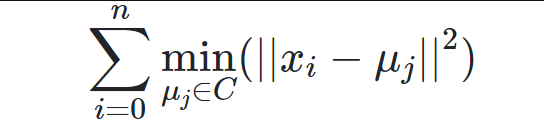


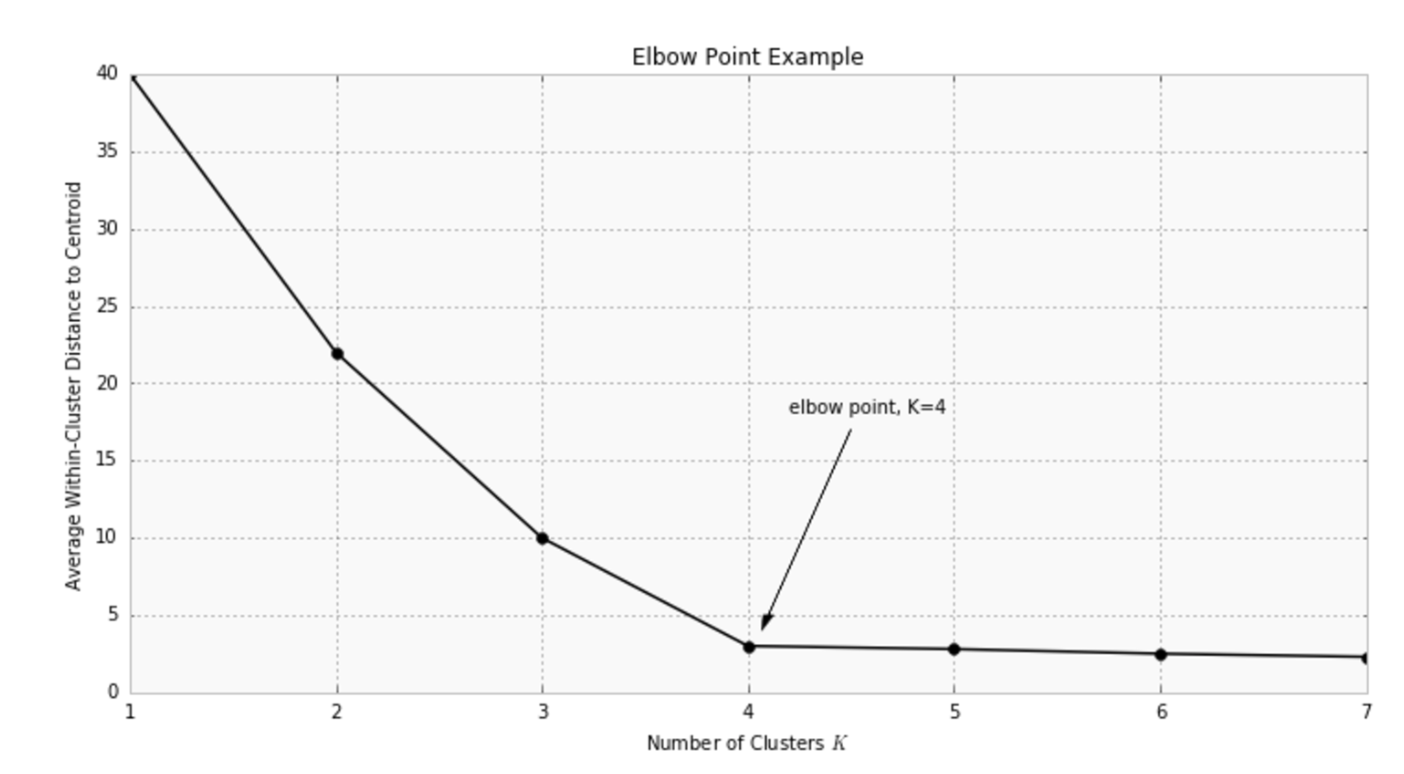

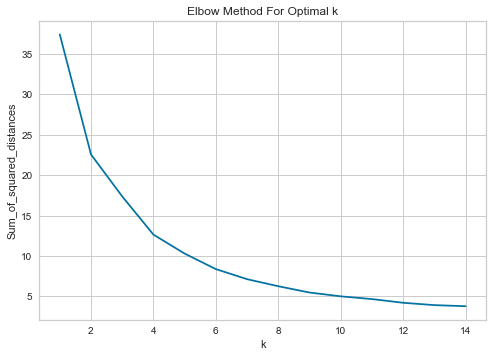

In [57]:
Sum_of_squared_distances =[]
K = range(1,15)

for i in K:
    km = KMeans(n_clusters = i)
    km = km.fit(x_scaled)
    Sum_of_squared_distances.append(km.inertia_)
    
###plotting Elbow

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

# Visualização do silhueta escore

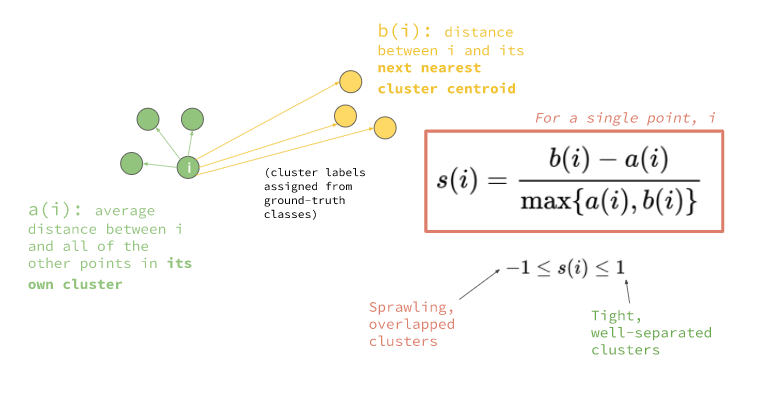

Para cada dado i:

- a(i) é a distância de i até o centro do seu cluster;
- b(i) é a distância média de i até os dados do cluster mais próximo;

- a(i) é a dissimilaridade média do objeto i em relação a todos os outros objetos do seu cluster;
- b(i) é a dissimilaridade média do objeto i em relação a todos os outros objetos do cluster vizinho mais próximo;



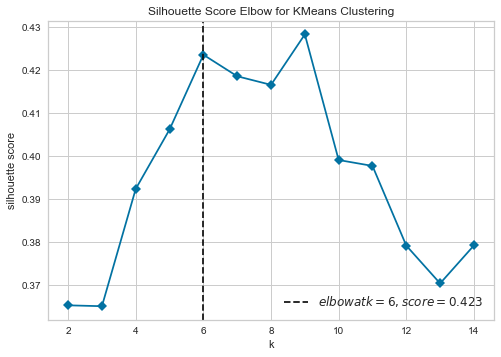

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [58]:
model = KMeans(random_state=123) 

visualizer = KElbowVisualizer(model, k=(2,15), metric='silhouette', timings=False)

visualizer.fit(x_scaled)    
visualizer.poof()

# Visualização dos clusters e a distância entre eles

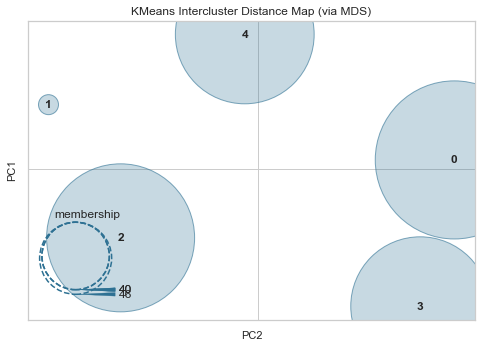

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [59]:
# Definido o número ótimo de clusters 

model = KMeans(5)
visualizer = InterclusterDistance(model)

visualizer.fit(x_scaled)       
visualizer.show()

# Como associar os rótulos ao dados originais

In [60]:
dataset['cluster'] = model.labels_
dataset.head()

,genre,age,annual_income_k$_,spending_score_1_100_,cluster
customerid,,,,,
1,Male,19,15,39,0
2,Male,21,15,81,0
3,Female,20,16,6,1
4,Female,23,16,77,0
5,Female,31,17,40,0


In [61]:
dataset.groupby(['cluster']).mean()

,age,annual_income_k$_,spending_score_1_100_
cluster,,,
0,25.185185,41.092593,62.240741
1,46.250000,26.750000,18.350000
2,55.978261,54.260870,49.043478
3,32.875000,86.100000,81.525000
4,39.875000,85.450000,19.875000


# K-Prototypes (Variável Categórica)

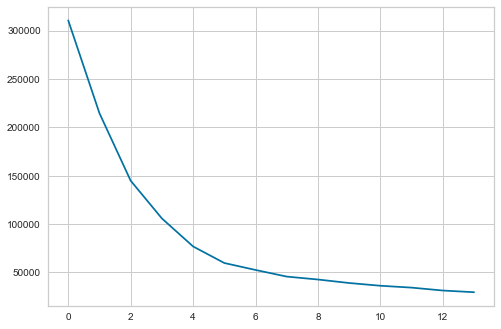

In [62]:
K = range(1,15)

cost = []

for num_clusters in K:
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao')
    kproto.fit_predict(dataset, categorical=[0])
    cost.append(kproto.cost_)

plt.plot(cost)

# Como associar os rótulos ao dados originais

In [71]:
kproto = KPrototypes(n_clusters= 5, init='Cao')
kproto.fit_predict(dataset, categorical=[0])

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 4, 2, 3, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 3, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2], dtype=uint16)

In [64]:
dataset['cluster_proto'] = kproto.labels_
dataset.head()

,genre,age,annual_income_k$_,spending_score_1_100_,cluster,cluster_proto
customerid,,,,,,
1,Male,19,15,39,0,0
2,Male,21,15,81,0,2
3,Female,20,16,6,1,0
4,Female,23,16,77,0,2
5,Female,31,17,40,0,0


# Recomendação de cesta 

Esse é um algoritmo extremamente útil para um cientista de dados, imagina que você trabalha em um supermercado e você busca algum método para alavancar as suas vendas. De modo, que você busca colocar próximo produtos que são consumidos simultaneamente. Por exemplo, quem compra pão compra manteiga, quem compra vinho compra queijo e assim sucessivamente.Então a ideia por trás desse algoritmo é encontrar regras de associações na compra de produtos.

## O algoritmo apresenta 3 métricas importantes


- Suporte: É a proporção de transação de um ou mais itens juntos sobre o conjunto total de transações. A transação pode se referir a um ou diversos itens.

- Confiança: É a proporção da frequência conjunta de transações que se aplica para a combinação dos itens consequentes e antecendentes, sobre as transações antecedentes. Dessa maneira, é o percentual das transações que contém o item X e Y de todas as transações que contém o X e não necessariamente o Y.

- Lift: A variável usada para ordenar as melhores combinações, ela se dá pela divisão da variável confiança do item X e Y sobre o suporte do item X. Ou seja, é uma variável que mede a correlação, que busca verificar o quanto as compras dos itens X e Y estão relacionadas. 


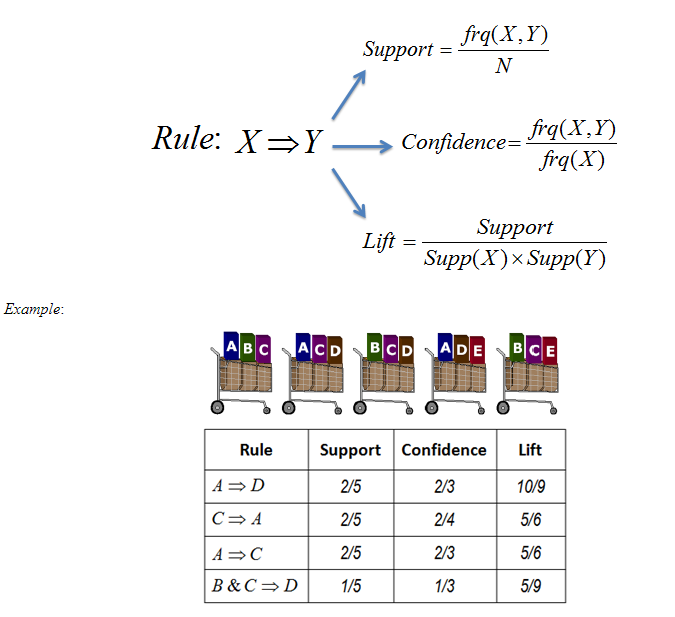

Num conjunto de 5 pessoas, 3 compraram produto A. Logo, o suporte é de 60%. Só que dentro das 3 pessoas que compraram o produto D, 2 compraram o produto A, logo a confiança será de 66.6%%. Por fim, a variável Lift será 66.6%/60% = 1.111. O resultado do Lift diz que quanto maior o número for de 1, maior a chance da compra dos itens combinados acontecerem.

In [65]:
compras_original = pd.read_csv(r'C:\Users\Angelo\Desktop\dataset_group.csv',
                      sep=',',
                      encoding='utf-8',
                      names = ['data','ticket','produto'])

In [66]:
compras_original

,data,ticket,produto
0,2000-01-01,1,yogurt
1,2000-01-01,1,pork
2,2000-01-01,1,sandwich bags
3,2000-01-01,1,lunch meat
4,2000-01-01,1,all- purpose
...,...,...,...
22338,2002-02-26,1139,soda
22339,2002-02-26,1139,laundry detergent
22340,2002-02-26,1139,vegetables
22341,2002-02-26,1139,shampoo


In [67]:
compras = pd.crosstab(compras_original.ticket, compras_original.produto, dropna=False)
compras

produto,all- purpose,aluminum foil,bagels,beef,butter,cereals,cheeses,coffee/tea,dinner rolls,dishwashing liquid/detergent,...,shampoo,soap,soda,spaghetti sauce,sugar,toilet paper,tortillas,vegetables,waffles,yogurt
ticket,,,,,,,,,,,,,,,,,,,,,
1,3,1,0,1,1,0,0,0,2,0,...,1,1,1,0,0,0,0,1,0,1
2,0,1,0,0,0,1,1,0,0,1,...,2,0,0,0,0,1,1,3,2,1
3,0,0,1,0,0,1,1,0,1,0,...,1,2,1,3,0,2,0,4,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
5,1,0,0,0,0,0,0,0,1,0,...,0,0,1,1,0,1,1,7,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,1,0,0,4,0,1,1,1,1,1,...,1,1,0,0,2,0,0,0,0,0
1136,0,0,0,0,0,2,1,1,4,1,...,0,1,0,1,0,0,0,1,0,0
1137,0,0,1,3,0,0,0,0,1,3,...,1,1,0,0,1,0,1,3,0,1


In [68]:
compras[compras>1] = 1
compras

produto,all- purpose,aluminum foil,bagels,beef,butter,cereals,cheeses,coffee/tea,dinner rolls,dishwashing liquid/detergent,...,shampoo,soap,soda,spaghetti sauce,sugar,toilet paper,tortillas,vegetables,waffles,yogurt
ticket,,,,,,,,,,,,,,,,,,,,,
1,1,1,0,1,1,0,0,0,1,0,...,1,1,1,0,0,0,0,1,0,1
2,0,1,0,0,0,1,1,0,0,1,...,1,0,0,0,0,1,1,1,1,1
3,0,0,1,0,0,1,1,0,1,0,...,1,1,1,1,0,1,0,1,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
5,1,0,0,0,0,0,0,0,1,0,...,0,0,1,1,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,1,0,0,1,0,1,1,1,1,1,...,1,1,0,0,1,0,0,0,0,0
1136,0,0,0,0,0,1,1,1,1,1,...,0,1,0,1,0,0,0,1,0,0
1137,0,0,1,1,0,0,0,0,1,1,...,1,1,0,0,1,0,1,1,0,1


In [69]:
frequent_itemsets = apriori(compras, min_support=0.3,use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(vegetables),(aluminum foil),0.739245,0.384548,0.310799,0.420428,1.093304,0.026524,1.061907
1,(aluminum foil),(vegetables),0.384548,0.739245,0.310799,0.808219,1.093304,0.026524,1.359651
2,(vegetables),(bagels),0.739245,0.385426,0.300263,0.406176,1.053836,0.015339,1.034943
3,(bagels),(vegetables),0.385426,0.739245,0.300263,0.779043,1.053836,0.015339,1.180118
4,(vegetables),(cereals),0.739245,0.395961,0.310799,0.420428,1.061789,0.018087,1.042214
